* TensorFlow
* Transfer Learning

## Configurar kaggle


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
%cd sample_data


[Errno 2] No such file or directory: 'sample_data'
/content/sample_data


In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download gpiosenka/100-bird-species


 99% 1.48G/1.49G [00:08<00:00, 61.7MB/s]
100% 1.49G/1.49G [00:08<00:00, 189MB/s] 


In [ ]:
!unzip 100-bird-species.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: train/VERMILION FLYCATHER/102.jpg  
  inflating: train/VERMILION FLYCATHER/103.jpg  
  inflating: train/VERMILION FLYCATHER/104.jpg  
  inflating: train/VERMILION FLYCATHER/105.jpg  
  inflating: train/VERMILION FLYCATHER/106.jpg  
  inflating: train/VERMILION FLYCATHER/107.jpg  
  inflating: train/VERMILION FLYCATHER/108.jpg  
  inflating: train/VERMILION FLYCATHER/109.jpg  
  inflating: train/VERMILION FLYCATHER/110.jpg  
  inflating: train/VERMILION FLYCATHER/111.jpg  
  inflating: train/VERMILION FLYCATHER/112.jpg  
  inflating: train/VERMILION FLYCATHER/113.jpg  
  inflating: train/VERMILION FLYCATHER/114.jpg  
  inflating: train/VERMILION FLYCATHER/115.jpg  
  inflating: train/VERMILION FLYCATHER/116.jpg  
  inflating: train/VERMILION FLYCATHER/117.jpg  
  inflating: train/VERMILION FLYCATHER/118.jpg  
  inflating: train/VERMILION FLYCATHER/119.jpg  
  inflating: train/VERMILION FLYCATHER/120.jpg  
  inflatin

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!nvidia-smi




Thu May 26 15:13:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    27W /  70W |    266MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2299.998
BogoMIPS:            4599.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [ ]:
! cat /proc/meminfo

MemTotal:       13298580 kB
MemFree:         1933032 kB
MemAvailable:   11575700 kB
Buffers:          129588 kB
Cached:          9108016 kB
SwapCached:            0 kB
Active:          1719044 kB
Inactive:        8875072 kB
Active(anon):    1103504 kB
Inactive(anon):    10716 kB
Active(file):     615540 kB
Inactive(file):  8864356 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:             63200 kB
Writeback:             0 kB
AnonPages:       1356480 kB
Mapped:           726308 kB
Shmem:             11452 kB
KReclaimable:     488696 kB
Slab:             550668 kB
SReclaimable:     488696 kB
SUnreclaim:        61972 kB
KernelStack:        5424 kB
PageTables:        14532 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6649288 kB
Committed_AS:    3917580 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       51468 kB
VmallocChunk:          0 kB
Percpu:          

## Imports

In [ ]:
import numpy as np
np.random.seed(11)



import pandas as pd 
import tensorflow as tf
import tensorflow_addons as tfa
import os
from tensorflow import keras


from tensorflow.keras import layers, optimizers, losses, metrics, callbacks, initializers
from tensorflow.keras import Sequential, Model, Input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from PIL import Image

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os


from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn

In [ ]:
# look at an image for 

## Pre processamento dos dados

In [ ]:
train="/content/sample_data/train"
test="/content/sample_data/test"
valid="/content/sample_data/valid"

TRAIN = "/content/sample_data/train"
VALID = "/content/sample_data/test"
TEST = "/content/sample_data/valid"

In [ ]:
from tensorflow.keras import layers

data_augmentation=keras.Sequential([
    layers.RandomFlip('vertical'),
    layers.RandomRotation(0.3,fill_mode='nearest'),
    # layers.Rescaling(scale=1.0/255)
],name='Data_Augmentation_Layer')

# Inception_v3

* **Data Loading**

In [ ]:
datagen= ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
    directory=TRAIN,
    batch_size=64,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224))

valid_generator=datagen.flow_from_directory(
    directory=VALID,
    batch_size=64,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224))

test_generator=datagen.flow_from_directory(
    directory=TEST,
    batch_size=64,
    shuffle=False,
    class_mode="categorical",
    target_size=(224, 224))


Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


## Criação do modelo


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout 

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IncV3 = InceptionV3(include_top = False, weights = "imagenet",input_shape = (224,224,3))
IncV3.trainable = False

inputs=layers.Input(shape=(224,224,3),name='input_layer')
x=data_augmentation(inputs)
IncV3=IncV3(x,training=False)
x = layers.GlobalMaxPooling2D()(IncV3)
x = layers.Dense(256, 'relu', kernel_initializer='he_normal')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(400, activation='softmax', name= 'outputs')(x)
model = Model(inputs= inputs, outputs= [outputs])


87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_Augmentation_Layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_94 (Bat  (None, 256)              1024  

## Compilando o modelo e treinando



In [ ]:
reducer = callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    patience=1, 
    verbose=1, 
    factor=0.1)

model.compile(optimizer=optimizers.Adam(0.001), 
              metrics=[metrics.CategoricalAccuracy(name='accuracy'), tfa.metrics.F1Score(400), metrics.TopKCategoricalAccuracy(k=5)], 
              loss=losses.CategoricalCrossentropy(label_smoothing=0.1))

history = model.fit(train_generator,
                    validation_data=valid_generator,
                    callbacks= reducer,
                    epochs=20)

Epoch 1/20
913/913 [==============================] - 153s 163ms/step - loss: 3.6760 - accuracy: 0.3405 - f1_score: 0.3275 - top_k_categorical_accuracy: 0.5972 - val_loss: 2.3639 - val_accuracy: 0.6450 - val_f1_score: 0.6230 - val_top_k_categorical_accuracy: 0.8920 - lr: 0.0010
Epoch 2/20
913/913 [==============================] - 147s 161ms/step - loss: 2.7830 - accuracy: 0.5317 - f1_score: 0.5239 - top_k_categorical_accuracy: 0.7963 - val_loss: 2.2095 - val_accuracy: 0.6780 - val_f1_score: 0.6670 - val_top_k_categorical_accuracy: 0.9165 - lr: 0.0010
Epoch 3/20
913/913 [==============================] - 145s 159ms/step - loss: 2.6503 - accuracy: 0.5681 - f1_score: 0.5621 - top_k_categorical_accuracy: 0.8209 - val_loss: 2.0086 - val_accuracy: 0.7605 - val_f1_score: 0.7491 - val_top_k_categorical_accuracy: 0.9555 - lr: 0.0010
Epoch 4/20
913/913 [==============================] - 144s 158ms/step - loss: 2.5839 - accuracy: 0.5899 - f1_score: 0.5854 - top_k_categorical_accuracy: 0.8323 - v

## Plotando o resultado

In [ ]:
def plot_loss_curves(history):
    
    '''
      returns seperate loss curves for training and validation metrics
    '''
    train_loss=history.history['loss']
    val_loss=history.history['val_loss']

    train_accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(1,len(history.history['loss'])+1)
    plt.figure(figsize=(20,7))
  # plot loss data
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,label="training_loss")
    plt.plot(epochs,val_loss,label="validation_loss")
    plt.title("Loss curves")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
  # plt.show()

  # plot accuracy data
    plt.subplot(1,2,2)
    plt.plot(epochs,train_accuracy,label="training_acc")
    plt.plot(epochs,val_accuracy,label="validation_acc")
    plt.title("Accuracy curves")
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()

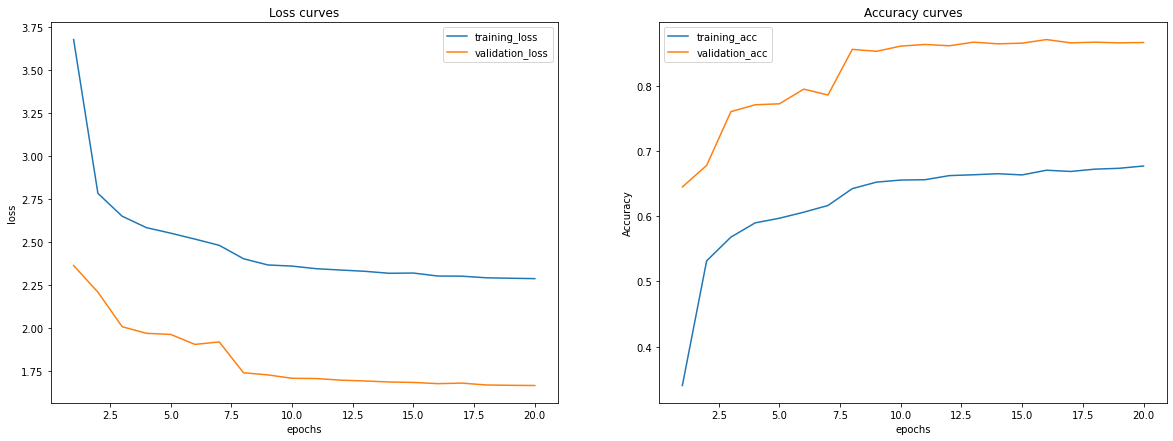

In [ ]:
plot_loss_curves(history)

* **Loss and Accuracy Graph**

In [ ]:
# Plot what's returned by model.fit() / model.fit_generator()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
##### Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()